In [1]:
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import matplotlib.ticker as yticker
from matplotlib import dates
import matplotlib.dates as mdates
import datetime

import koreanize_matplotlib

In [2]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [3]:
cur = remote.cursor(buffered=True)

In [4]:
sql = """select * from interest_rate"""
cur.execute(sql)

result = cur.fetchall()
print(len(result))
# for result_iterator in result:
#     print(result_iterator)

241


In [5]:
df1 = pd.DataFrame(result, columns=["date", "k", "usa"])
df1["date"] = df1["date"].astype(str)
df1.set_index("date", inplace=True)
df1.tail(), df1.head()

(              k  usa
 date                
 2024-05-01  3.5  5.5
 2024-06-01  3.5  5.5
 2024-07-01  3.5  5.5
 2024-08-01  3.5  5.5
 2024-09-01  3.5  5.0,
                k   usa
 date                  
 2004-09-01  3.50  1.50
 2004-10-01  3.50  1.75
 2004-11-01  3.50  1.75
 2004-12-01  3.25  2.00
 2005-01-01  3.25  2.25)

In [6]:
df1_index_list = list(df1.index)
len(df1_index_list)
np.arange(0, len(df1_index_list), 12)

len_row1 = len(df1_index_list)

In [7]:
df1_index_list[:4]

['2004-09-01', '2004-10-01', '2004-11-01', '2004-12-01']

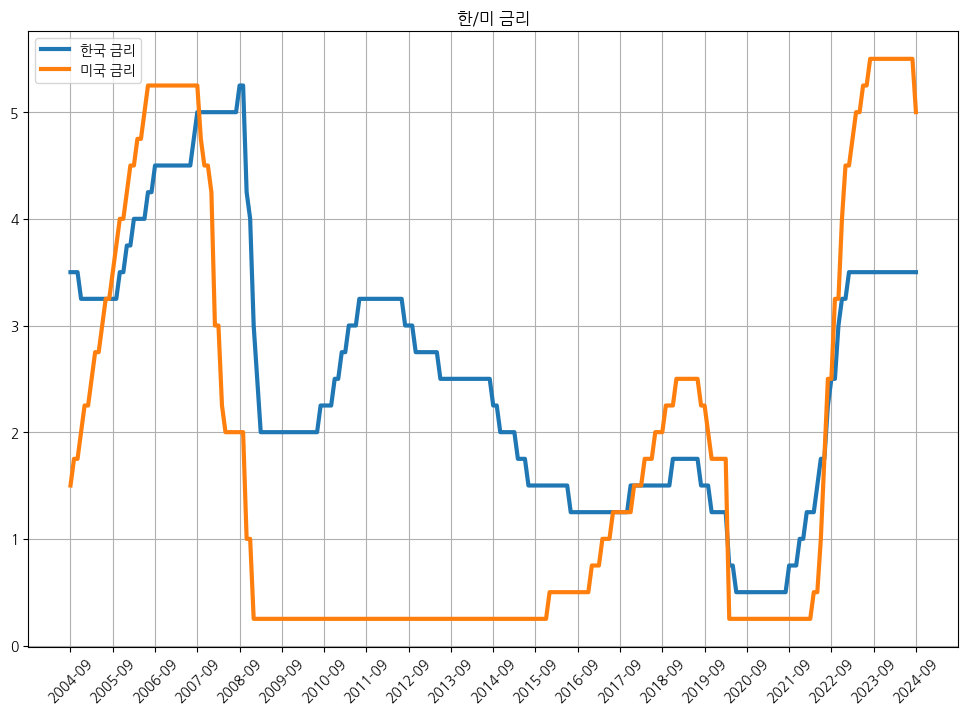

In [8]:
plt.figure(figsize=(12,8))

temp = df1.index[:]
temp2 = []
for idx, i in enumerate(temp):
    text = temp[idx]
    temp2.append(text[:-3])

plt.plot(temp2, df1["k"], linewidth=3)
plt.plot(temp2, df1["usa"], linewidth=3)

plt.rc('xtick', labelsize=15)
plt.xticks(np.arange(0, len_row1, 12), rotation=45)
plt.grid()
plt.title("한/미 금리")
plt.legend(["한국 금리", "미국 금리"])
# ax = plt.gca()
# plt.gca().xaxis.set_major_formatter(yticker.FormatStrFormatter('%.-3i'))
# plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=1))
plt.savefig('../data/interest_rate.jpg',dpi=200)
plt.show()

241


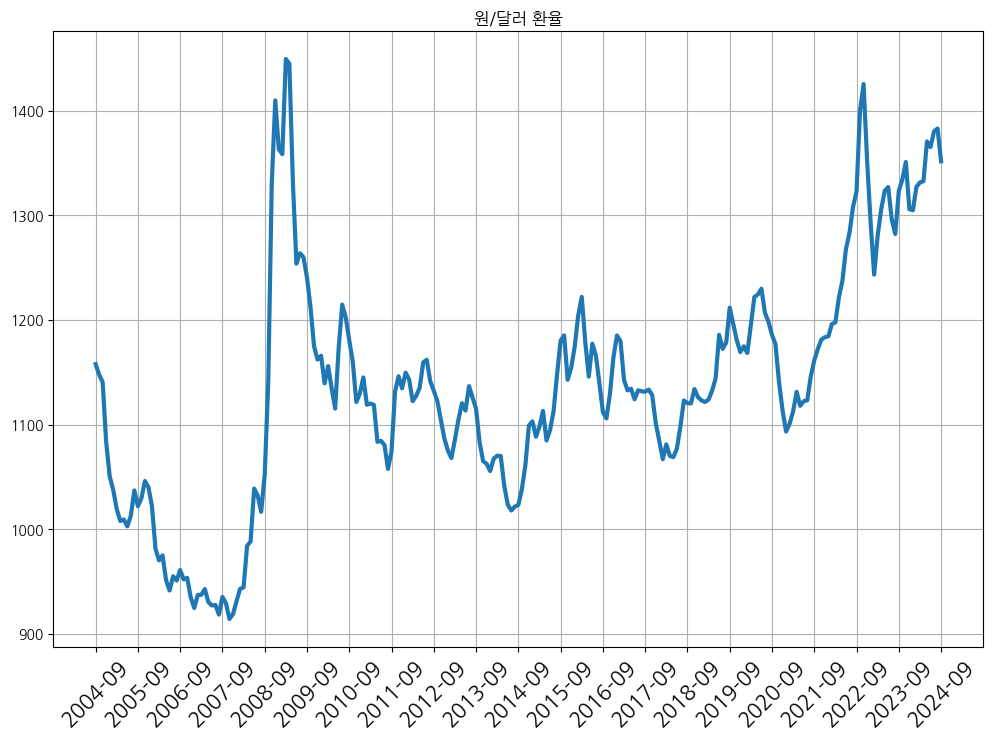

In [9]:
sql = """select * from exchange_rate"""
cur.execute(sql)

result = cur.fetchall()
print(len(result))
# for result_iterator in result:
    # print(result_iterator)

df2 = pd.DataFrame(result, columns=["date", "e_r"])
df2["date"] = df2["date"].astype(str)
df2.set_index("date", inplace=True)
df2.tail(), df2.head()

temp = df2.index[:]
temp2 = []
for idx, i in enumerate(temp):
    text = temp[idx]
    # print(text[:-6])
    temp2.append(text[:-3])

df2_index_list = list(df2.index)
# len(df2_index_list)
# np.arange(0, len(df2_index_list), 12)
len_row2 = len(df2_index_list)

plt.figure(figsize=(12,8))
plt.plot(temp2, df2["e_r"], linewidth=3)
# plt.plot(df2.index, df2["e_r"])

plt.rc('xtick', labelsize=15)
plt.xticks(np.arange(0, len_row2, 12), rotation=45)
plt.grid()
plt.title("원/달러 환율")
plt.savefig('../data/exchange_rate.jpg', dpi=200)
plt.show()

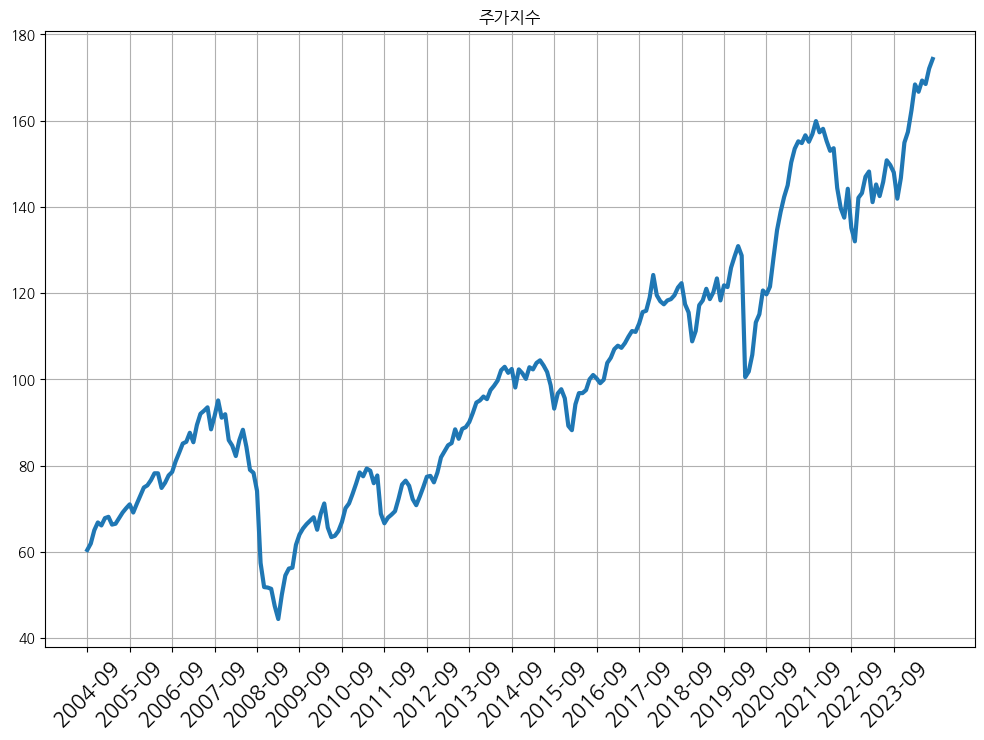

In [10]:
sql = """select * from stock_index"""
cur.execute(sql)

result = cur.fetchall()

df3 = pd.DataFrame(result, columns=["date", "s_i", "r_o_c"])
df3["date"] = df3["date"].astype(str)
df3.set_index("date", inplace=True)

temp = df3.index[:]
temp2 = []
for idx, i in enumerate(temp):
    text = temp[idx]
    temp2.append(text[:-3])

df3_index_list = list(df3.index)

len_row3 = len(df3_index_list)

plt.figure(figsize=(12,8))
plt.plot(temp2, df3["s_i"], linewidth=3)
plt.rc('xtick', labelsize=15)
plt.xticks(np.arange(0, len_row3, 12), rotation=45)
plt.grid()
plt.title("주가지수")
plt.savefig('../data/stock_index.jpg', dpi=200)
plt.show()

/tmp/ipykernel_4660/3010957150.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


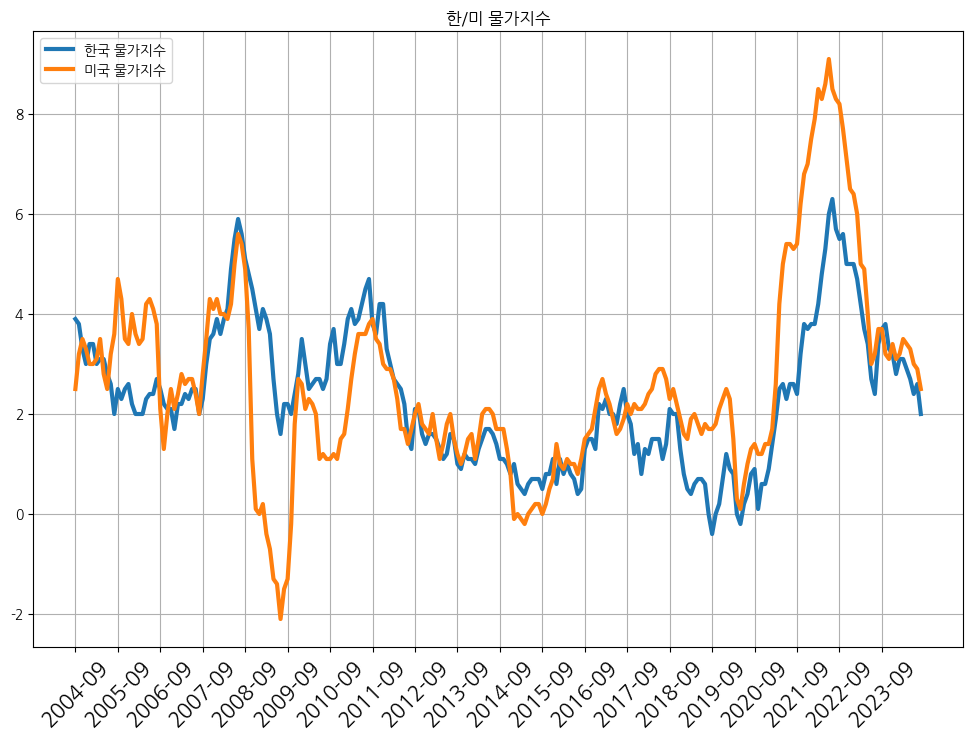

In [11]:
sql = """select * from price_index"""
cur.execute(sql)

result = cur.fetchall()

df4 = pd.DataFrame(result, columns=["date", "k_p_i", "usa_p_i"])
df4["date"] = df4["date"].astype(str)
df4.set_index("date", inplace=True)
df4.tail(), df4.head()

temp = df4.index[:]
temp2 = []
for idx, i in enumerate(temp):
    text = temp[idx]
    temp2.append(text[:-3])

df4_index_list = list(df4.index)

len_row4 = len(df4_index_list)

fig = plt.figure(figsize=(12,8))
plt.plot(temp2, df4["k_p_i"], linewidth=3)
plt.plot(temp2, df4["usa_p_i"], linewidth=3)
plt.rc('xtick', labelsize=15)
plt.xticks(np.arange(0, len_row4, 12), rotation=45)
plt.grid()
plt.legend()
plt.title("한/미 물가지수")
plt.legend(["한국 물가지수", "미국 물가지수"])
plt.savefig('../data/price_index.jpg', dpi=200)
plt.show()

[(datetime.date(2004, 3, 1), 1.4, 2.3), (datetime.date(2004, 6, 1), 0.8, 3.1), (datetime.date(2004, 9, 1), 0.3, 3.8), (datetime.date(2004, 12, 1), 0.8, 4.1), (datetime.date(2005, 3, 1), 0.9, 4.5), (datetime.date(2005, 6, 1), 1.9, 2.0), (datetime.date(2005, 9, 1), 1.4, 3.2), (datetime.date(2005, 12, 1), 1.1, 2.2), (datetime.date(2006, 3, 1), 1.6, 5.5), (datetime.date(2006, 6, 1), 0.7, 1.0), (datetime.date(2006, 9, 1), 1.6, 0.6), (datetime.date(2006, 12, 1), 0.8, 3.5), (datetime.date(2007, 3, 1), 1.8, 1.2), (datetime.date(2007, 6, 1), 1.7, 2.5), (datetime.date(2007, 9, 1), 1.2, 2.3), (datetime.date(2007, 12, 1), 2.0, 2.5), (datetime.date(2008, 3, 1), 0.8, -1.7), (datetime.date(2008, 6, 1), 0.4, 2.4), (datetime.date(2008, 9, 1), 0.7, -2.1), (datetime.date(2008, 12, 1), -3.4, -8.5), (datetime.date(2009, 3, 1), 0.3, -4.5), (datetime.date(2009, 6, 1), 1.4, -0.7), (datetime.date(2009, 9, 1), 3.1, 1.4), (datetime.date(2009, 12, 1), 0.7, 4.4), (datetime.date(2010, 3, 1), 2.3, 1.9), (datetime.da

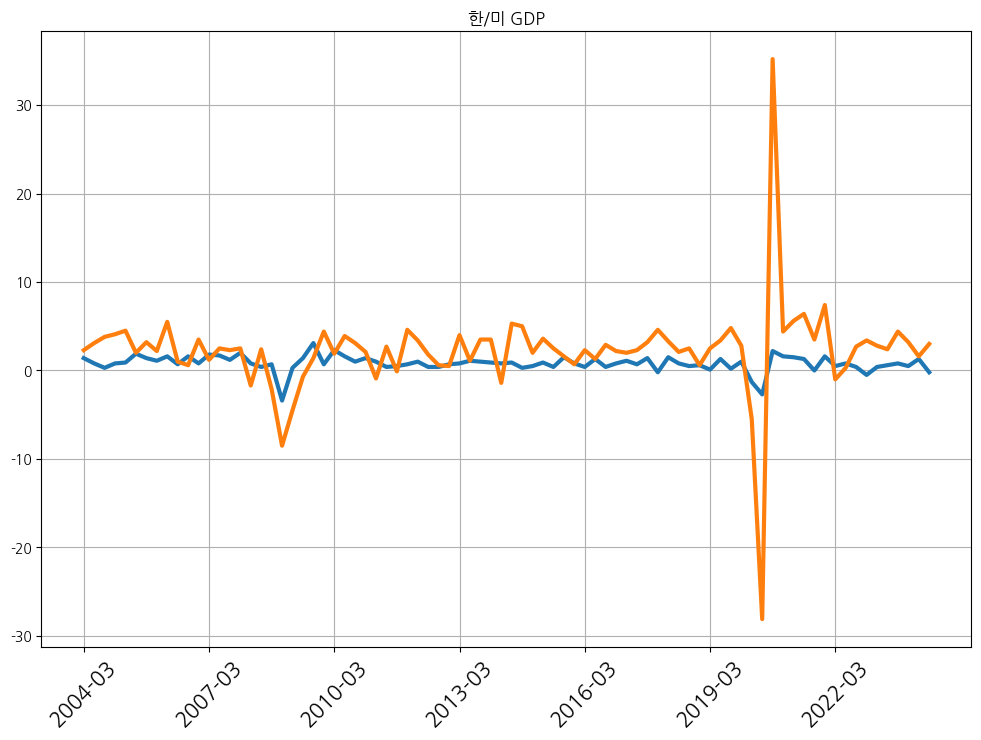

In [12]:
sql = """select * from gdp"""
cur.execute(sql)

result = cur.fetchall()
print(result)
df5 = pd.DataFrame(result, columns=["date", "k_gdp", "usa_gdp"])
df5["date"] = df5["date"].astype(str)
df5.set_index("date", inplace=True)

df5_index_list = list(df5.index)

temp = df5.index[:]
temp2 = []
for idx, i in enumerate(temp):
    text = temp[idx]
    temp2.append(text[:-3])

len_row5 = len(df5_index_list)
plt.figure(figsize=(12,8))
plt.plot(temp2, df5["k_gdp"], linewidth=3)
plt.plot(temp2, df5["usa_gdp"], linewidth=3)
plt.rc('xtick', labelsize=15)
plt.xticks(np.arange(0, len_row5, 12), rotation=45)
plt.grid()
plt.title("한/미 GDP")
plt.savefig('../data/gdp.jpg', dpi=200)
plt.show()

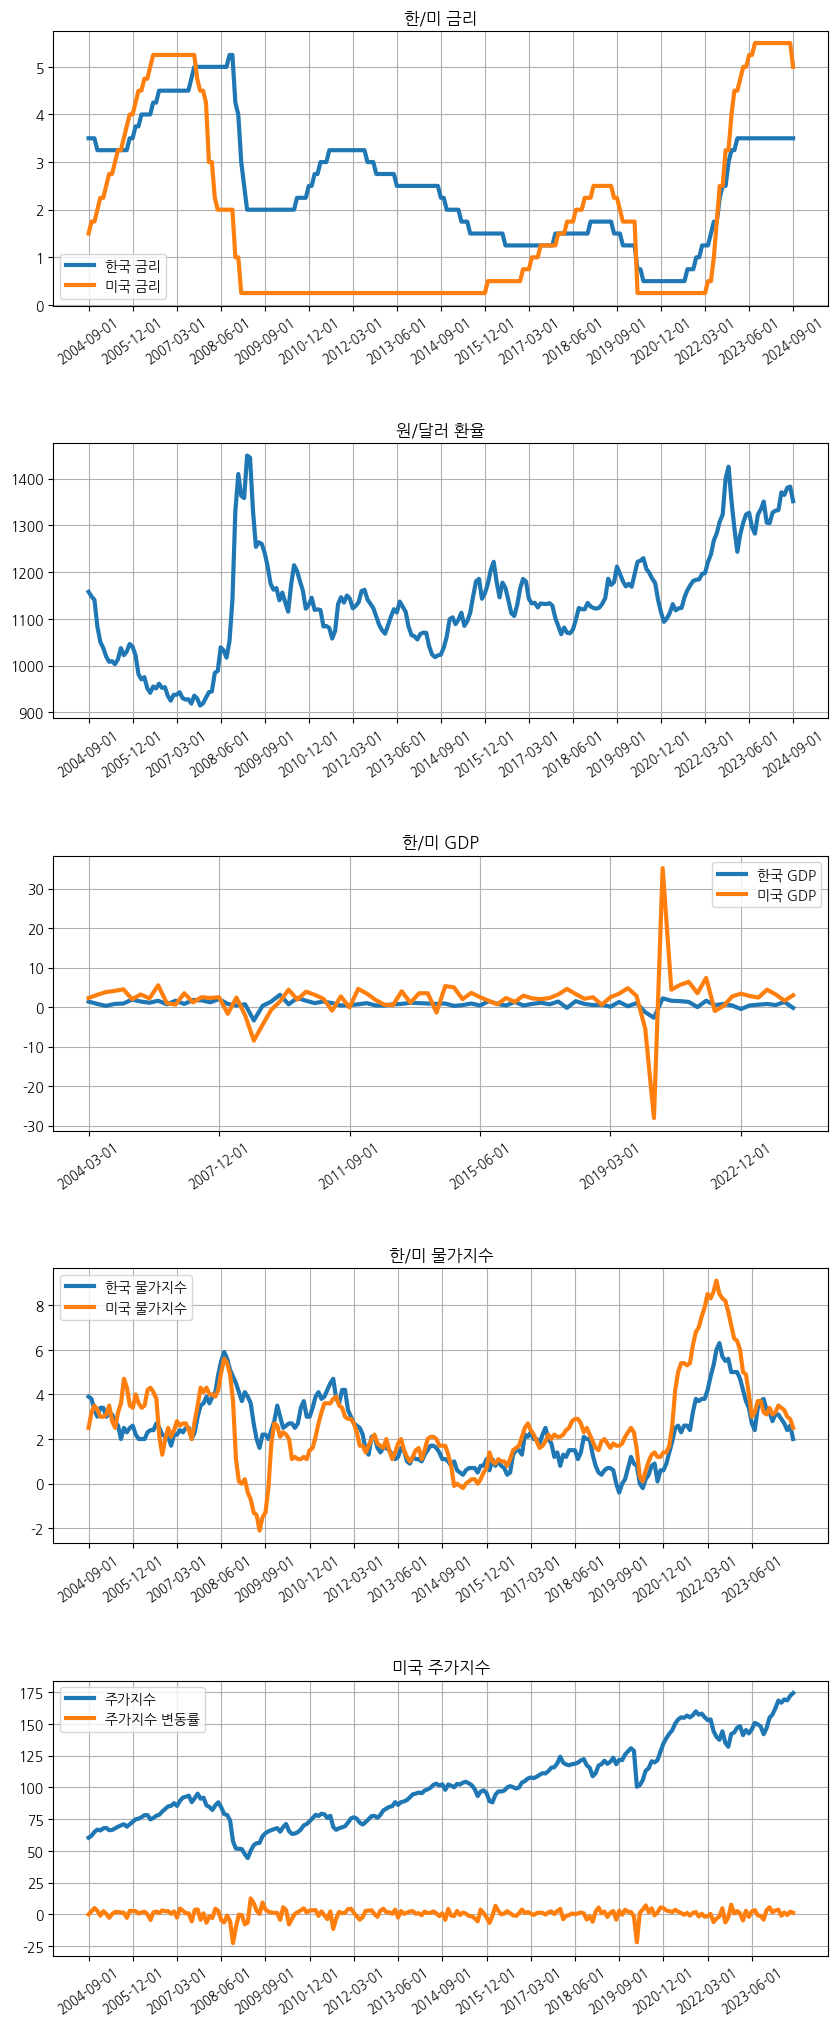

In [15]:
plt.rc('xtick', labelsize=9)
plt.figure(figsize=(10,25))

plt.subplot(511)
plt.plot(df1, linewidth=3)
plt.grid()
plt.title("한/미 금리")
plt.legend(["한국 금리", "미국 금리"])
plt.xticks(np.arange(0, len_row1, 15), rotation=35)

plt.subplot(512)
plt.plot(df2, linewidth=3)
plt.grid()
plt.title("원/달러 환율")
plt.xticks(np.arange(0, len_row2, 15), rotation=35)

plt.subplot(515)
plt.plot(df3, linewidth=3)
plt.grid()
plt.title("미국 주가지수")
plt.legend(["주가지수", "주가지수 변동률"])
plt.xticks(np.arange(0, len_row3, 15), rotation=35)

plt.subplot(514)
plt.plot(df4, linewidth=3)
plt.grid()
plt.legend(["한국 물가지수", "미국 물가지수"])
plt.title("한/미 물가지수")
plt.xticks(np.arange(0, len_row4, 15), rotation=35)

plt.subplot(513)
plt.plot(df5, linewidth=3)
plt.grid()
plt.legend(["한국 GDP", "미국 GDP"])
plt.title("한/미 GDP")
plt.xticks(np.arange(0, len_row5, 15), rotation=35)

plt.subplots_adjust(hspace=0.5)

plt.savefig('../data/all.jpg', dpi=200)
plt.show()

In [14]:
remote.close()